In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Preprocesamieto de los datos

Consigna 1.- Leer los datos del archivo tabla nutricional.csv. Completar las
celdas faltantes con ceros. Poner todos los datos en la misma unidad.



In [37]:
#importación de datos
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

#remplazo de valores nulos por 0
tabla_nutricional.fillna(0, inplace=True)

#alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
#tabla_nutricional = tabla_nutricional.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
#tabla_nutricional = tabla_nutricional.mul(100 / tabla_nutricional['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
#tabla_nutricional['Alimento'] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
cols = tabla_nutricional.columns # Na (mg);Ca (mg);Fe (mg);
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000  #divido por mil las columnas con mg para obtener gr
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols_to_drop = [col for col in cols if 'mg' in col] #elimino las columnas con mg
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.0,1.62,0.77,0.060,0.0,0.04444,0.09900,0.000060
2,Yogurt,19.00,2.45,0.51,0.49,0.0,0.32,0.14,0.014,0.0,0.00799,0.01767,0.000005
3,Queso crema,1.66,0.06,0.10,0.37,0.0,0.36,0.11,0.010,0.0,0.00123,0.00093,0.000000
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.0,0.76,0.21,0.020,0.0,0.02084,0.01654,0.000000


In [38]:
#ante la duda, como el total de gramos en la tabla de la canasta básica es 1897g, casi 2kg, 
#asumimos que efectivamente representa la necesidad nutricional de 1 día
col_sums = tabla_nutricional.drop('Alimento', axis='columns').sum().to_numpy()
col_sums[3]

76.911

Consigna 2.- Desarrollar una funci´on que reciba como par´ametro un DataFrame y que eval´ue si las cantidades de los principales elementos de la dieta, prote´ınas, carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los m´argenes
de ingesta de la OMS. Esta funci´on debe devolver VERDADERO si los cumple.
Verificar la Canasta B´asica con esta funci´on.

**TODO: Preguntar si efectivamente la función tiene que dar true, y las condiciones uno a uno también.**

**Sodio tiene que dar igual? Más de 200? 10% de tolerancia?**

- Es por día??????
- Cómo sería los gr/ml?

In [39]:
"""
Recibe como parámetro un DataFrame y evalúa si las cantidades de los principales elementos de la dieta, 
proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras, 
cumple los márgenes de ingesta de la OMS:
Proteinas 10-15 %
Carbohidratos totales 55-75 %b (bruto)
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia
"""
def oms_check (df:pd.DataFrame):

    #sumamos cada columna de nutriente y la guardamos en un array (sin la de alimentos)
    nutrientes_totales = df.drop('Alimento', axis='columns').sum().to_numpy()
    #listamos manualmente las frutas y verduras de la lista de alimentos
    lista_fru_y_ver = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 'Batata']
    #lista de columnas
    cols = df.columns
    #buscamos el indice de cada columna en el dataframe
    proteinas_index = cols.get_loc('Proteinas (gr)')
    hc_index = cols.get_loc('HC (gr)')
    grasas_index = cols.get_loc('Grasas (gr)')
    sodio_index = cols.get_loc('Na (gr)')
    fibra_index = cols.get_loc('Fibra (gr)')
    cantidad_index = cols.get_loc('Cantidad (gr/ml)')

    #guardamos los datos de nutrientes con el indice obtenido
    cantidad = nutrientes_totales[cantidad_index]
    #guardamos directamente los porcentajes sobre el total cuando ese es el dato que nos importa
    proteinas = (nutrientes_totales[proteinas_index]*100)/cantidad
    hc = (nutrientes_totales[hc_index]*100)/cantidad
    grasas = (nutrientes_totales[grasas_index]*100)/cantidad
    sodio = nutrientes_totales[sodio_index]
    fibra = nutrientes_totales[fibra_index]
    #filtramos las frutas y verduras, seleccionamos la columna de cantidad en mg y sumamos
    fru_y_ver = df[df['Alimento'].isin(lista_fru_y_ver)]['Cantidad (gr/ml)'].sum()

    #generate a dictionary with the results
    results = {'Proteinas': proteinas, 
               'HC': hc, 'Grasas': grasas, 
               'Sodio': sodio, 'Fibra': fibra, 
               'Frutas y Verduras': fru_y_ver}
    
    print(results)

    # for 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 190 < sodio < 210 and fibra > 25000 and fru_y_ver >= 400000 print an array of trues and false
    print([10 < proteinas < 15, 55 < hc < 75, 15 < grasas < 30, 0.19 < sodio < 0.21, fibra > 25, fru_y_ver >= 400])

    #finalizamos chequeando que las condiciones dadas de la OMS se cumplan efectivamente (para los 200mg de sodio damos un 10% de tolerancia ya que es difícil que nos de exactamente ese valor)
    return 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 0.19 < sodio < 0.21 and fibra > 25 and fru_y_ver >= 400


oms_check(tabla_nutricional)

{'Proteinas': 18.748034663058977, 'HC': 27.402098797030963, 'Grasas': 13.83353443757846, 'Sodio': 0.71888, 'Fibra': 3.337714, 'Frutas y Verduras': 634.0}
[False, False, False, False, False, True]


False

### Análisis en Componentes Principales

Consigna 3.- Realizar un An´alisis en Componentes Principales (ACP), tomando
el valor nutricional de cada alimento por gramo. Graficar cada alimento como un
punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gr´afico, analizar los clusteres que quedan planteados por
la proyecci´on.

In [40]:
#copiamos la función del Labo 7 y hacemos algunas modificaciones a la tabla nutricional para que funcione correctamente
alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
alimentos_arr = alimentos.to_numpy()
#sacamos los alimentos para tener sólo números y convertimos a numpy para obtener una matriz
tabla_nutricional_matriz = tabla_nutricional.copy()
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
tabla_nutricional_matriz = tabla_nutricional_matriz.T #transponemos la tabla para que las columnas sean los alimentos

def calculoACP(data):
    d, n = data.shape # d, 1444 es la dimensión de los datos, n, 380 es la cantidad de datos
    m=np.mean(data, axis=1) #calculamos la media de los datos por columnas, para cada dimensión (x1, ... xd)
    # np.tile repite la media m, n veces, para que tenga la misma dimensión que data
    # luego la restamos a data
    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    # calculamos la matriz de covarianza, que es X*X^T/n ya que 
    Mcov = np.dot(X,X.T) / n # Covariance Matrix

    D, V = np.linalg.eigh(Mcov)

    # ordenamos los autovalores de mayor a menor
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

D, V, X, m = calculoACP(tabla_nutricional_matriz)



Cantidad de autovectores de representación al 99 %:  3


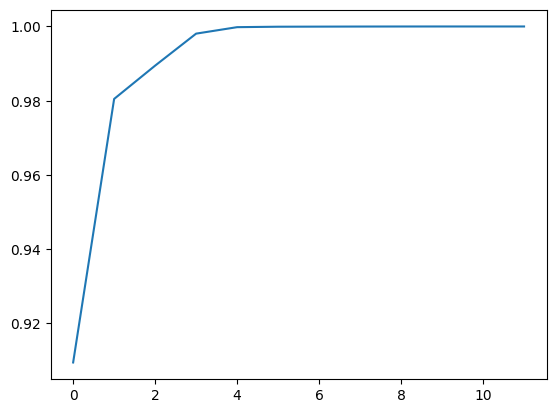

In [41]:
ratio = np.cumsum(D) / np.sum(D)
plt.plot(ratio)
plt.plot(np.cumsum(D[100:])/ np.sum(D))
x = np.where(ratio > 0.99)[0]
M = x[0]

print('Cantidad de autovectores de representación al 99 %: ', M)


Cantidad de datos:  57 Cantidad de dimensiones:  12


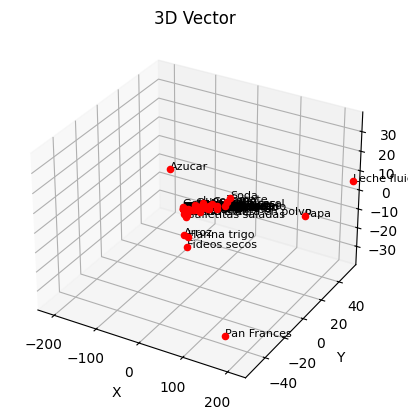

In [42]:
#proyección de los datos en el espacio de dimensión M
len, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', len)

proyecciones = np.zeros((cantidad, M))

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=8, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])

# Show the plot
plt.show()

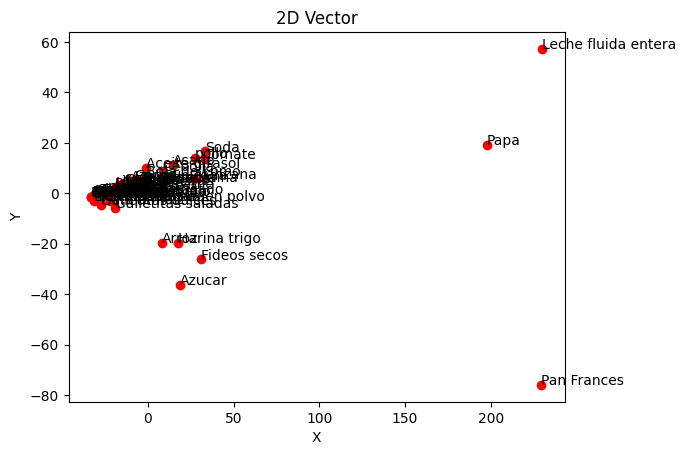

In [43]:
# Create the figure and axis
fig, ax = plt.subplots()

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], c='r', marker='o')
    ax.annotate(alimentos_arr[i], (proyecciones[i, 0], proyecciones[i, 1]))

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector')

# Show the plot
plt.show()

### Aumentos de Precios

Consigna 4.- Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

[33, 27, 44, 30, 28, 6, 26, 0, 56, 16, 17, 19, 31, 22, 21, 11, 7, 8, 10]


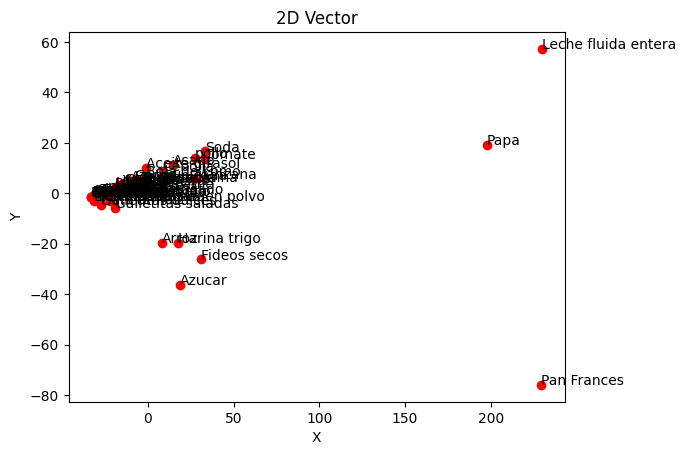

In [44]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')

consumidores_libres.head()

productos = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']

#productos_consumidores = tabla_nutricional[tabla_nutricional['Alimento'].isin(productos)]
#sacamos los alimentos para tener sólo números y convertimos a numpy para obtener una matriz, luego trasponemos para tener los valores en columnas
#productos_consumidores_matriz = productos_consumidores.drop('Alimento', axis='columns').to_numpy().T

#proyección de los datos en el espacio de dimensión M = 2

producto_indices = []

for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")

print(producto_indices)
# Create the figure and axis
fig, ax = plt.subplots()

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], c='r', marker='o')
    ax.annotate(alimentos_arr[i], (proyecciones[i, 0], proyecciones[i, 1]))

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Vector')

# Show the plot
plt.show()

- Qué hacemos con los alimentos que no están en la CBA?

### Mínimos Cuadrados

Consigna 5.- Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.


solo estos alimentos estan en ambos archivos? 

In [55]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# paso todos los aliments de ambos archivos a minisculas para ver los alimentos en comun
tabla_nutricional['Alimento'] = tabla_nutricional['Alimento'].str.lower()
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# busco los alimentos en comun
alimentos_comunes = set(tabla_nutricional['Alimento']).intersection(set(consumidores['PRODUCTOS']))

print("Alimentos comunes encontrados en ambos archivos:")
for alimento in alimentos_comunes:
    print(alimento)


Alimentos comunes encontrados en ambos archivos:
naranja
asado
manzana
cebolla
bola de lomo


In [85]:
alimentos_tabla_nutrucional=['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
alimentos_consumidores_libres_en_minisculas = ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana','asado', 'paleta', 'carne picada comun','yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol','arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco','leche c/vit.fort']


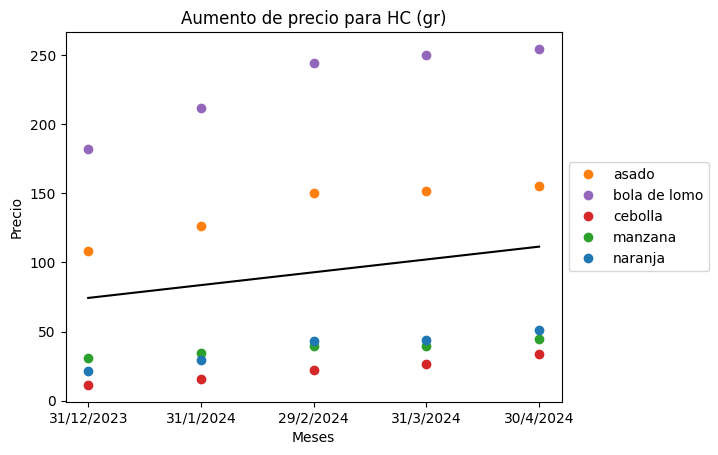

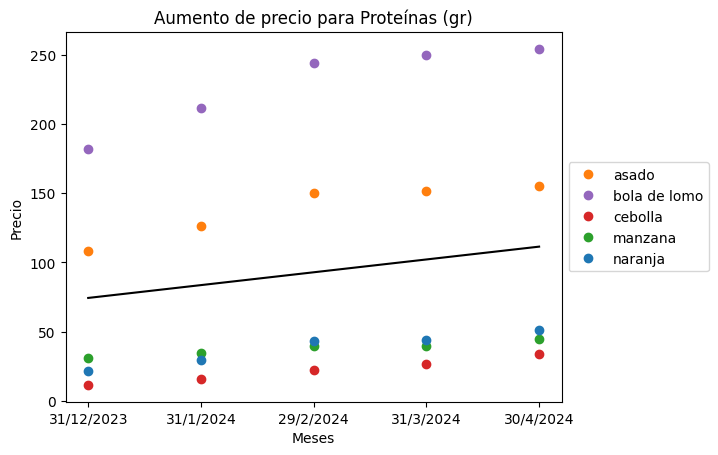

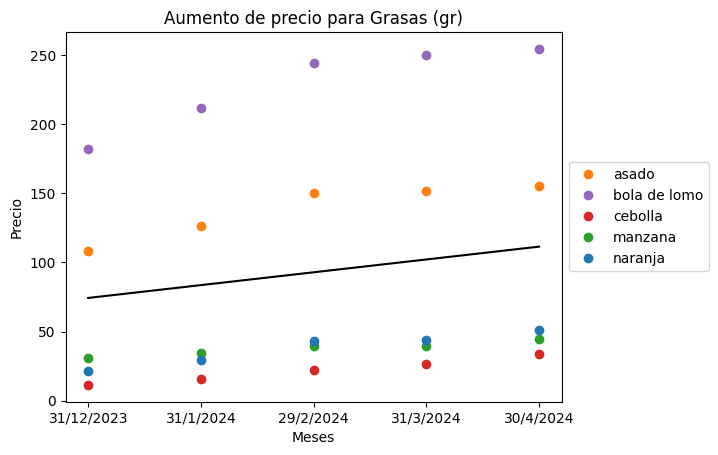

        Nutriente   Aumento
0         HC (gr)  9.276669
1  Proteínas (gr)  9.276669
2     Grasas (gr)  9.276669


In [92]:
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# tomo las ultimas 4 columnas de archivo...los meses a evaluar
fechas = consumidores.columns[-5:]

#vuelvo a pasar los alimentos a munisculas
tabla_nutricional['Alimento'] = tabla_nutricional['Alimento'].str.lower()
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# crreo una lista para almacenar los aumentos
aumentos = []

colores = {}
for i, alimento in enumerate(alimentos_comunes):
    colores[alimento] = plt.cm.tab10(i)

# voy iterando por cada nutriente y los almaceno en su respectiva lista
for nutriente in ['HC (gr)', 'Proteínas (gr)', 'Grasas (gr)']:
    precios_nutriente = []
    nombres_alimentos = []
    colores_alimentos = []

    # itero sobre cada fila de la tabla_nutrional y busco el precio correspondiente a cada alimento
    for index, row in tabla_nutricional.iterrows():
        alimento = row['Alimento']
        cantidad = row['Cantidad (gr/ml)']
        
        precio_fila = consumidores[consumidores['PRODUCTOS'] == alimento][fechas]
        
        if precio_fila.empty:
            continue
        
        # calculo el precio y lo pongo en su lista
        precio_nutriente = precio_fila.iloc[0] / cantidad
        precios_nutriente.append(precio_nutriente.values)
        
        # agrego el nombre del alimento y su color correspondiente a las listas
        nombres_alimentos.append(alimento)
        colores_alimentos.append(colores[alimento])
    
    # convierto la lista en un DataFrame
    precios_nutriente = pd.DataFrame(precios_nutriente)
    
    if precios_nutriente.empty:
        continue

    # ajusto un modelo de regresión lineal
    X = np.arange(5).reshape(-1, 1)
    y = precios_nutriente.mean(axis=0)
    model = LinearRegression().fit(X, y)
    
    # busco la pendinete de la recta
    aumento = model.coef_[0]
    aumentos.append((nutriente, aumento))
    
    # grafico los puntos y la recta de regresión
    plt.figure()
    for i in range(precios_nutriente.shape[0]):
        plt.plot(fechas, precios_nutriente.iloc[i], 'o', color=colores_alimentos[i], label=nombres_alimentos[i])
    plt.plot(fechas, model.predict(X), '-', color='black')
    plt.title(f'Aumento de precio para {nutriente}')
    plt.xlabel('Meses')
    plt.ylabel('Precio')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# creo una tabla de aumentos
tabla_aumentos = pd.DataFrame(aumentos, columns=['Nutriente', 'Aumento'])
print(tabla_aumentos)


Consigna 6.- Comparar el aumento de la carne en comparacíon con los otros rubros. Si la gente consume ese porcentaje menos de carne, como queda la ingesta individual con respecto a la tabla de metas de la OMS?

In [47]:
pd.set_option('display.max_columns', None)
consumidores
#veo la tabla completa y me fijo a mano para agrupar por ¿rubros?
#agrupo en vez de solo carne...meto a las proteinas todas juntas y asi con los demas alimentos.

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,aceite cocinero girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,arroz grano fino,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,azucar ledesma,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,fideos guiseros,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,harina de trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0
5,huevos color docena,720,2200.0,2600.0,3000.0,3400.0,3800.0
6,pan fresco,1000,1650.0,2100.0,2200.0,2300.0,2300.0
7,leche c/vit.fort,1000,1100.0,1210.0,1620.0,1890.0,1990.0
8,yerba taragui,1000,2800.0,3700.0,4600.0,4950.0,5500.0
9,zanahorias,1000,820.0,990.0,1100.0,1100.0,1100.0


In [48]:
frutas_y_verduras = ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana']
carne = ['asado', 'paleta', 'carne picada comun']
otros = ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol']
hc = ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco']
lacteos = ['leche c/vit.fort']

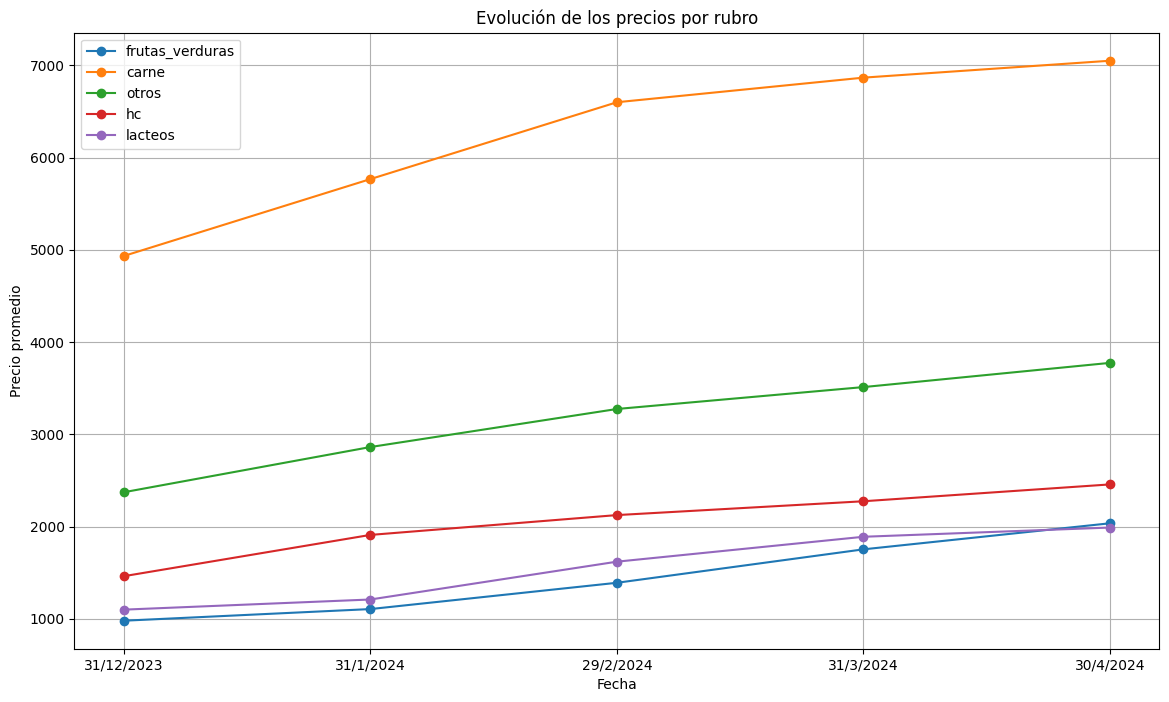

             Rubro  Aumento (%)
0  frutas_verduras   107.780612
1            carne    42.905405
2            otros    59.114858
3               hc    68.034188
4          lacteos    80.909091


In [49]:
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

#vuelvo a pasar los alimentos a munisculas
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# defino los rubros de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'carne picada comun'],
    'otros': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol'],
    'hc': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'lacteos': ['leche c/vit.fort']
}

# filtro los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores[consumidores['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

# tomo las ultimas 4 columnas de archivo...los meses a evaluar
fechas = consumidores.columns[-5:]

# creo un DataFrame para los precios a lo largo del tiempo
precios_tiempo = consumidores_filtrado.set_index('PRODUCTOS')[fechas].T

# calculo el aumento promedio para cada rubro y preparar los datos para graficar
aumentos_promedio = {}
datos_para_graficar = {}

for nombre, productos in grupos_alimentos.items():
    # filtro precios de los productos del grupo
    datos = precios_tiempo[productos]
    datos_para_graficar[nombre] = datos.mean(axis=1)  # es el promedio de precios por fecha
    
    # calculo el aumento promedio de precios del grupo
    precio_inicial = datos.iloc[0].mean()
    precio_final = datos.iloc[-1].mean()
    aumento_promedio = ((precio_final - precio_inicial) / precio_inicial) * 100
    aumentos_promedio[nombre] = aumento_promedio

# creo el gráfico
plt.figure(figsize=(14, 8))

for nombre, datos in datos_para_graficar.items():
    plt.plot(fechas, datos, marker='o', linestyle='-', label=nombre)

plt.title('Evolución de los precios por rubro')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio')
plt.legend()
plt.grid(True)
plt.show()

# me armo una tabla con los porcentajes de aumento
aumentos_df = pd.DataFrame(list(aumentos_promedio.items()), columns=['Rubro', 'Aumento (%)'])
print(aumentos_df)


Si una persona consume 100g de carne, la reducción del 42% en el consumo de carne será:

Consumo inicial= 100g

Reducción en el consumo = 100g x 0.42g = 42g
Nuevo consumo de carne = 100g - 42g = 58g

Usamos los siguientes valores nutricionales aproximados por 100g de carne:

Proteínas: 26g

Grasas totales: 10g

Para 58g de carne, la ingesta de nutrientes sería:

Proteinas = 26g x 0.58 = 15.08g
Grasas totales = 10g x 0.58 = 5.8g


Vamos a comparar estos valores con las recomendaciones de la OMS para una dieta de 2000 kcal:

Proteínas: 10-15% de la energía total (200-300 kcal)
Grasas totales: 15-30% de la energía total (300-600 kcal)

Proteínas:
Energia de proteinas = 15.08g × 4kcal/g = 60.32kcal

Porcentaje de energia=(60.32kcal / 2000kcal) × 100 = 3.01%

Grasas totales:
Energiaa de grasas = 5.8g × 9kcal/g = 52.2kcal

Porcentaje de energia = (52.2kcal / 2000kcal) × 100 = 2.61%

Comparando estos valores con las metas de la OMS, observamos lo siguiente:

Proteínas: La ingesta de proteínas disminuyó a 3.01% de la energía total, que es significativamente menor que el 10-15% recomendado por la OMS. Esto nos dice que la dieta sería deficiente en proteínas.
Grasas totales: La ingesta de grasas totales disminuye a 2.61% de la energía total, muy por debajo del 15-30% recomendado por la OMS. Esto indica que la dieta también sería deficiente en grasas.

Conclusión
Si la gente consume un 42% menos de carne debido al aumento del precio, la ingesta de proteínas y grasas totales disminuirá significativamente, quedando por debajo de las recomendaciones de la OMS para una dieta equilibrada. Por lo tanto, sería necesario buscar fuentes alternativas de proteínas y grasas para cumplir con las metas de ingesta de nutrientes para una alimentación saludable según la OMS.

In [79]:
import pandas as pd

# Leer el archivo CSV de consumidores_libres
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# Convertir los nombres de los alimentos a minúsculas para facilitar la comparación
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# Definir los grupos de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'carne picada comun'],
    'otros': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol'],
    'hc': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'lacteos': ['leche c/vit.fort']
}

# Filtrar los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores[consumidores['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]


# Crear DataFrame
consumidores = pd.DataFrame(consumidores_filtrado)

# Calcular el porcentaje de aumento
consumidores["Aumento (%)"] = ((consumidores["30/4/2024"] - consumidores["31/12/2023"]) / consumidores["31/12/2023"]) * 100

# Mostrar los resultados
print("Aumentos por producto")
consumidores[['PRODUCTOS','Aumento (%)']]



Aumentos por producto


,PRODUCTOS,Aumento (%)
0,aceite cocinero girasol,48.000000
1,arroz grano fino,115.151515
2,azucar ledesma,5.527638
3,fideos guiseros,43.125000
4,harina de trigo,77.894737
5,huevos color docena,72.727273
6,pan fresco,39.393939
7,leche c/vit.fort,80.909091
8,yerba taragui,96.428571
9,zanahorias,34.146341


C:\Users\pkoif\AppData\Local\Temp\ipykernel_16848\41288680.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumidores_filtrado['Aumento (%)'] = ((consumidores_filtrado['30/4/2024'] - consumidores_filtrado['31/12/2023']) / consumidores_filtrado['31/12/2023']) * 100


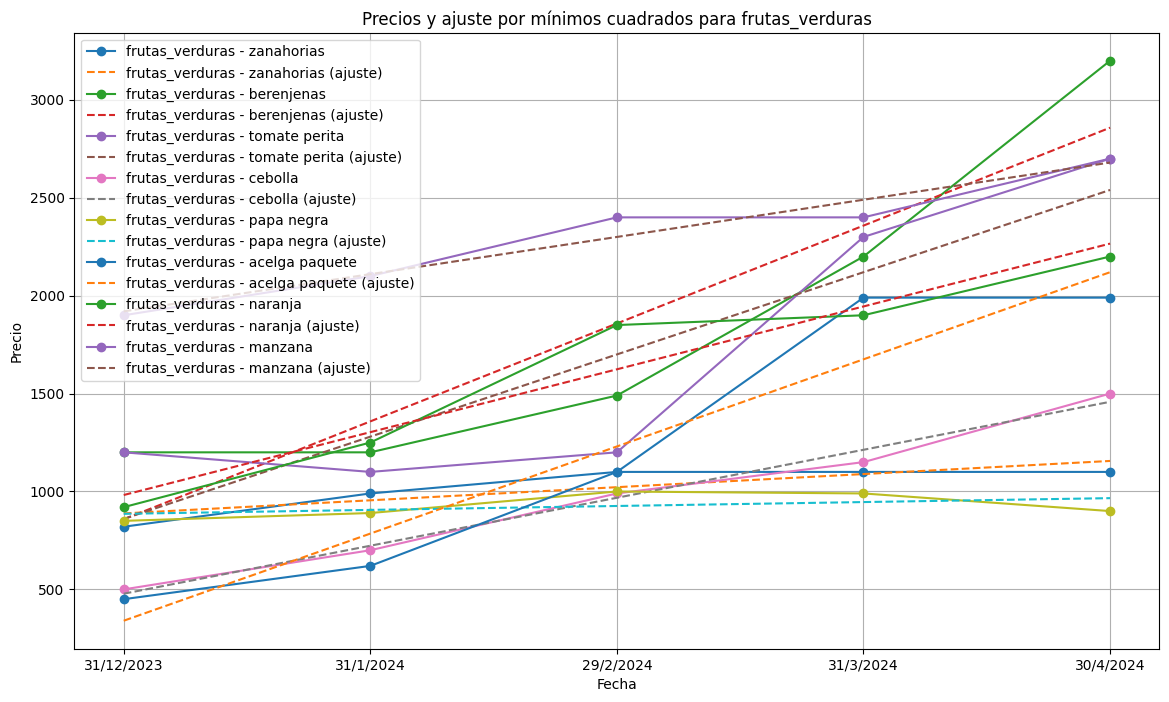

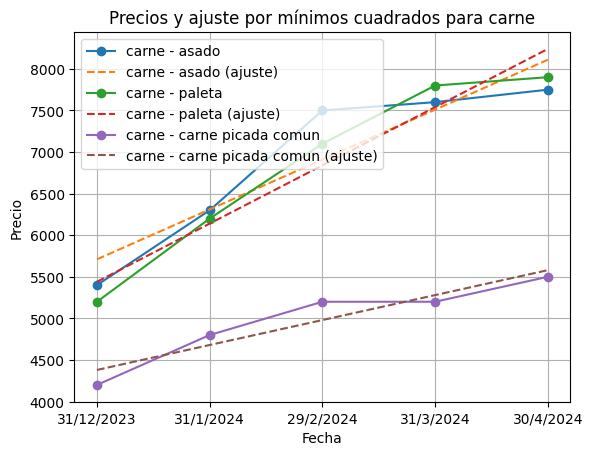

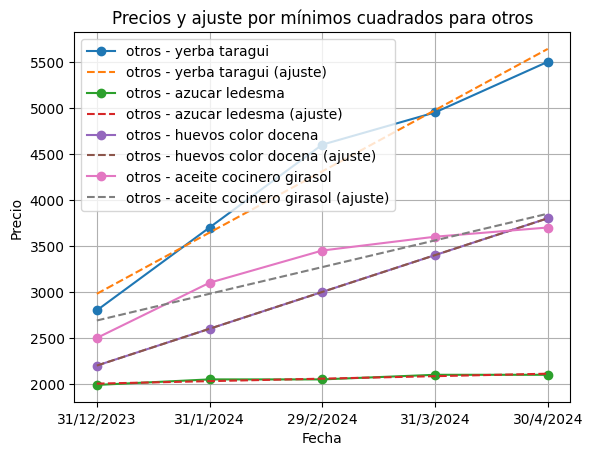

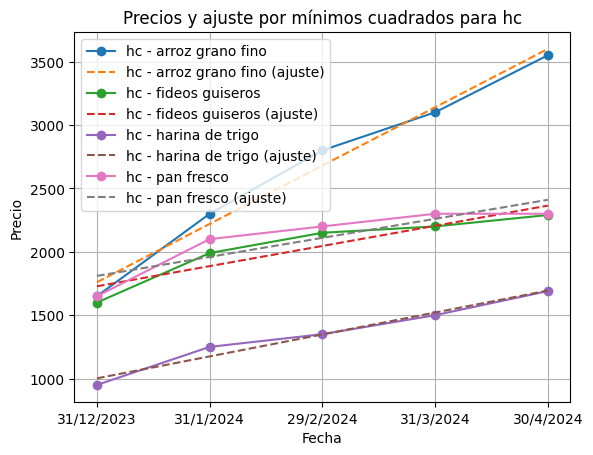

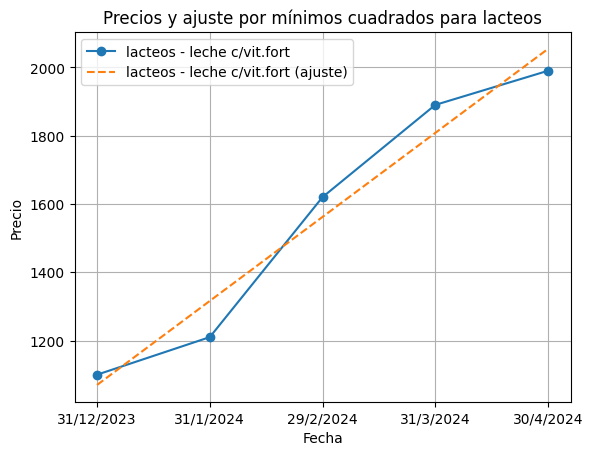

In [51]:
# Leer el archivo CSV de consumidores_libres
consumidores = pd.read_csv('consumidores_libres.csv', sep=';')

# Convertir los nombres de los alimentos a minúsculas para facilitar la comparación
consumidores['PRODUCTOS'] = consumidores['PRODUCTOS'].str.lower()

# Definir los grupos de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'carne picada comun'],
    'otros': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol'],
    'hc': ['arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco'],
    'lacteos': ['leche c/vit.fort']
}

# Filtrar los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores[consumidores['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

# Calcular el porcentaje de aumento para cada producto
consumidores_filtrado['Aumento (%)'] = ((consumidores_filtrado['30/4/2024'] - consumidores_filtrado['31/12/2023']) / consumidores_filtrado['31/12/2023']) * 100

# Fechas para el gráfico
fechas = consumidores.columns[-5:]

# Crear un DataFrame para los precios a lo largo del tiempo
precios_tiempo = consumidores_filtrado.set_index('PRODUCTOS')[fechas].T

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Función para ajustar y graficar una regresión lineal
def ajustar_y_graficar(datos, nombre):
    X = np.arange(5).reshape(-1, 1)  # Variables independientes (índices de tiempo)
    for producto in datos.columns:
        y = datos[producto].values.reshape(-1, 1)  # Variable dependiente (precios)
        modelo = LinearRegression().fit(X, y)  # Ajustar el modelo
        y_pred = modelo.predict(X)  # Predicciones
        
        plt.plot(fechas, y, marker='o', linestyle='-', label=f'{nombre} - {producto}')
        plt.plot(fechas, y_pred, linestyle='--', label=f'{nombre} - {producto} (ajuste)')
    
    plt.title(f'Precios y ajuste por mínimos cuadrados para {nombre}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.show()

# Aplicar la función a cada grupo de alimentos
for nombre, productos in grupos_alimentos.items():
    datos = precios_tiempo[productos]
    ajustar_y_graficar(datos, nombre)


este ultimo es un grafico extra que me parecia llamativo...miralo jajaja yo se que te gustan los graficos asi JAJAJAJAJA ;)